
# Modelado y Evaluación - Avance 2 (v1.0.1)

Este notebook implementa el flujo de entrenamiento y evaluación de modelos supervisados, siguiendo los requerimientos del proyecto:
1. Carga de datos procesados (feature engineering).
2. Definición de funciones helper (`build_model`, `summarize_classification`).
3. Entrenamiento de modelos base (Regresión Logística, Árbol de Decisión, Random Forest).
4. Evaluación comparativa con métricas y gráficos.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import sys
import os

# Ajustar path para importar ft_engineering si es necesario
sys.path.append(os.path.abspath("."))
from ft_engineering import feature_engineering, cargar_datos


## 1. Carga y Procesamiento de Datos

In [2]:

# Cargar datos originales
try:
    df = cargar_datos("../../Base_de_datos.xlsx") # Ajustar ruta según ejecución
except:
    df = cargar_datos("Base_de_datos.xlsx")

# Ejecutar pipeline de ingeniería de características
X_train, X_test, y_train, y_test, preprocessor = feature_engineering(df)

print("Datos procesados correctamente.")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Variables Numéricas (19): ['tipo_credito', 'capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente', 'total_otros_prestamos', 'cuota_pactada', 'puntaje', 'puntaje_datacredito', 'cant_creditosvigentes', 'huella_consulta', 'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor', 'creditos_sectorFinanciero', 'creditos_sectorCooperativo', 'creditos_sectorReal', 'promedio_ingresos_datacredito']
Variables Nominales (1): ['tipo_laboral']
Variables Ordinales (1): ['tendencia_ingresos']
Ingeniería de características completada.
Shape Train: (8610, 22)
Shape Test: (2153, 22)
Datos procesados correctamente.
Train shape: (8610, 22), Test shape: (2153, 22)


## 2. Funciones Helper (Requerimiento)

In [3]:

def build_model(model, X_train, y_train):
    """
    Entrena el modelo proporcionado con los datos de entrenamiento.
    Retorna el modelo entrenado.
    """
    print(f"Entrenando {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    return model

def summarize_classification(y_true, y_pred, y_proba=None, title="Modelo"):
    """
    Genera un reporte resumen de la clasificación:
    - Métricas principales
    - Matriz de Confusión
    - Reporte de Clasificación
    Retorna un diccionario con las métricas.
    """
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    auc = "N/A"
    if y_proba is not None:
        try:
            auc = roc_auc_score(y_true, y_proba)
        except:
            pass
            
    print(f"--- Resumen: {title} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if auc != "N/A":
        print(f"AUC: {auc:.4f}")
        
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred))
    
    # Matriz de Confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {title}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return {
        'Model': title,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'AUC': auc if auc != "N/A" else 0
    }


## 3. Entrenamiento de Modelos Base

Entrenando LogisticRegression...
--- Resumen: Logistic Regression ---
Accuracy: 0.9981
Precision: 0.9985
Recall: 0.9995
F1 Score: 0.9990
AUC: 0.9999

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       102
           1       1.00      1.00      1.00      2051

    accuracy                           1.00      2153
   macro avg       0.99      0.99      0.99      2153
weighted avg       1.00      1.00      1.00      2153



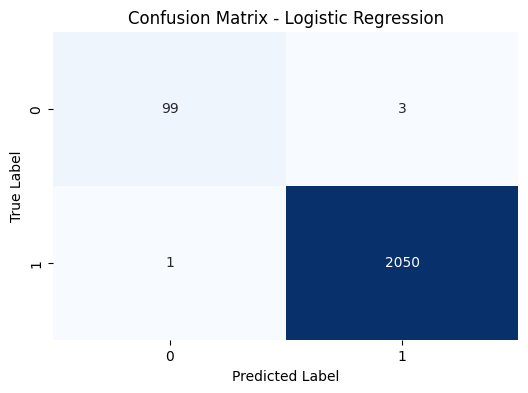

Entrenando DecisionTreeClassifier...
--- Resumen: Decision Tree ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC: 1.0000

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00      2051

    accuracy                           1.00      2153
   macro avg       1.00      1.00      1.00      2153
weighted avg       1.00      1.00      1.00      2153



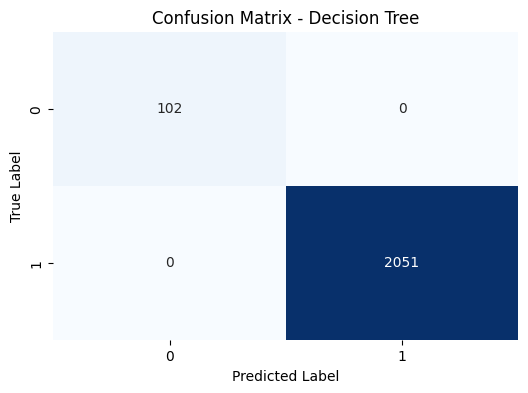

Entrenando RandomForestClassifier...


--- Resumen: Random Forest ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC: 1.0000

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00      2051

    accuracy                           1.00      2153
   macro avg       1.00      1.00      1.00      2153
weighted avg       1.00      1.00      1.00      2153



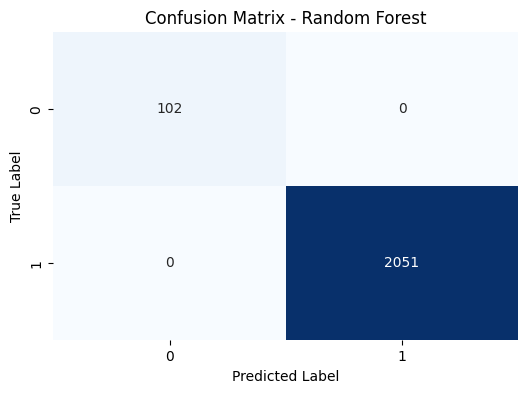

In [4]:

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
}

results = []
trained_models = {}

for name, model in models.items():
    # Entrenar (build_model)
    clf = build_model(model, X_train, y_train)
    trained_models[name] = clf
    
    # Predecir
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
    
    # Evaluar (summarize_classification)
    metrics = summarize_classification(y_test, y_pred, y_proba, title=name)
    results.append(metrics)


## 4. Comparación y Selección del Mejor Modelo

                 Model  Accuracy  Precision    Recall        F1       AUC
0  Logistic Regression  0.998142   0.998539  0.999512  0.999025  0.999895
1        Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
2        Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000


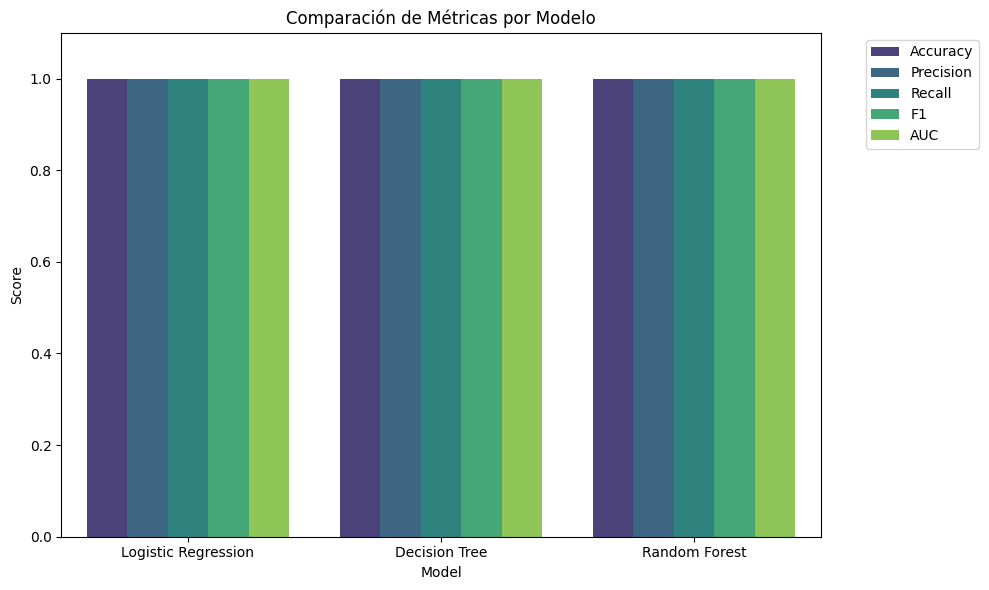

El mejor modelo basado en F1-Score es: Decision Tree


In [5]:

results_df = pd.DataFrame(results)
print(results_df)

# Gráfico Comparativo de Métricas
results_df_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_melted, x="Model", y="Score", hue="Metric", palette="viridis")
plt.title("Comparación de Métricas por Modelo")
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Selección (basado en F1 por ejemplo, o Recall si el negocio prioriza captar morosos)
best_model_name = results_df.loc[results_df['F1'].idxmax(), 'Model']
print(f"El mejor modelo basado en F1-Score es: {best_model_name}")
